In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers_df= pd.read_csv('customers_dataset.csv')
geolocation_df= pd.read_csv('geolocation_dataset.csv')
order_items_df= pd.read_csv('order_items_dataset.csv')
order_payments_df= pd.read_csv('order_payments_dataset.csv')
order_reviews_df= pd.read_csv('order_reviews_dataset.csv')
orders_df= pd.read_csv('orders_dataset.csv')
product_category_name_df= pd.read_csv('product_category_name_translation.csv')
products_df= pd.read_csv('products_dataset.csv')
sellers_df= pd.read_csv('sellers_dataset.csv')

# DATA UNDERSTANDING & CLEANING:

### **Customers Dataframe**

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
#Check duplicate with no subset
customers_df.duplicated().any()

False

**Finding the difference between customer_id & customer_unique_id**

In [6]:
customers_df.duplicated(subset=['customer_id']).any()

False

In [7]:
customers_df.duplicated(subset=['customer_unique_id']).any()

True

It can be see from simple analysis that have been done above, `customer_unique_id` is not unique because it contain duplicated value. So the one that will be use for the next analysis is `customer_id`

### **Geolocation Dataframe**

In [8]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [10]:
geolocation_df.duplicated().any()

True

In [11]:
geolocation_df.drop_duplicates(inplace=True)

### **Order Items Dataframe**

In [12]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
order_items_df.duplicated().any()

False

### **Order Payments Dataframe**

In [15]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [17]:
order_payments_df.duplicated().any()

False

### **Order Reviews Dataframe**

In [18]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
order_reviews_df.duplicated().any()

False

In [21]:
#Handling NULL VALUE non numeric column; NULL value on `review_comment_title` and `review_comment_message`
#Drop `review_comment_title` and `review_comment_message` --> >50% NULL VALUE
order_reviews_df.drop(['review_comment_title','review_comment_message'],axis=1,inplace=True)

### **Orders Dataframe**

In [22]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [24]:
orders_df.duplicated().any()

False

In [25]:
#HANDLING NULL VALUE non numeric column
#NULL value on `order_approved_at`,`order_delivered_carrier_date`,`order_delivered_customer_date`,`order_estimated_delivery_date`
#NULL VALUE approximately <10% --> delete rows
orders_df.dropna(inplace=True)
orders_df.reset_index(inplace=True)

In [26]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          96461 non-null  int64 
 1   order_id                       96461 non-null  object
 2   customer_id                    96461 non-null  object
 3   order_status                   96461 non-null  object
 4   order_purchase_timestamp       96461 non-null  object
 5   order_approved_at              96461 non-null  object
 6   order_delivered_carrier_date   96461 non-null  object
 7   order_delivered_customer_date  96461 non-null  object
 8   order_estimated_delivery_date  96461 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.6+ MB


### **Product Category Name**

In [27]:
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [28]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [29]:
product_category_name_df.duplicated().any()

False

### **Products Dataframe**

In [30]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [31]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
products_df.duplicated().any()

False

In [33]:
#HANDLING NULL VALUE non numeric column; `product_categoty_name` NULL VALUE <10% --> Delete rows
products_df.dropna(subset=['product_category_name'],inplace=True)

In [34]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [35]:
#`product_weight_g, product_length_cm, product_height_cm, and product_width_cm still have 1 NULL VALUE
# just drop the ALL NULL VALUE row
products_df.dropna(inplace=True)
products_df.reset_index(inplace=True)

### **Sellers Dataframe**

In [36]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [37]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [38]:
sellers_df.duplicated().any()

False

###  **-----------------------------------ALL NULL VALUE & DUPLICATE DATA HAS BEEN HANDLED-------------------------------**

# RFM ANALYSIS:

* Recency = The freshness of customer activity, be it purchases or vist <br>
  (E.g. : Time since last order or last engaged with the product)
* Frequency = The frequency of customer transaction or visit <br>
  (E.g. : Total number of transactions or average time between transactions / engaged visit)
* Monetary = The intention of customer to spend or purchasing power or customer <br>
  (E.G. : Total or average transactions value)
  
  source : https://clevertap.com/blog/rfm-analysis/

In [39]:
#Combine the dataframe so the dataframe contain the whole information needed to perform RFM analysis
rfm_raw = pd.merge(customers_df, orders_df, on='customer_id')
rfm_raw = rfm_raw.merge(order_reviews_df, on='order_id')
rfm_raw = rfm_raw.merge(order_items_df, on='order_id')
rfm_raw = rfm_raw.merge(order_payments_df, on='order_id')
rfm_raw = rfm_raw.merge(sellers_df, on='seller_id')
rfm_raw = rfm_raw.merge(products_df, on='product_id')
rfm_raw = rfm_raw.merge(product_category_name_df, on='product_category_name')
#geolocation_df will not be use,If geolocation_df used it will make many duplicates data which will cause bias to dataframe

In [40]:
rfm_raw.shape

(113193, 40)

In [41]:
rfm_raw.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index_x,order_id,order_status,order_purchase_timestamp,order_approved_at,...,index_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,32209,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,60047,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,...,32209,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,60047,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,...,32209,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,42931,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,...,32209,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,32077,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,...,32209,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [42]:
rfm_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 113192
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113193 non-null  object 
 1   customer_unique_id             113193 non-null  object 
 2   customer_zip_code_prefix       113193 non-null  int64  
 3   customer_city                  113193 non-null  object 
 4   customer_state                 113193 non-null  object 
 5   index_x                        113193 non-null  int64  
 6   order_id                       113193 non-null  object 
 7   order_status                   113193 non-null  object 
 8   order_purchase_timestamp       113193 non-null  object 
 9   order_approved_at              113193 non-null  object 
 10  order_delivered_carrier_date   113193 non-null  object 
 11  order_delivered_customer_date  113193 non-null  object 
 12  order_estimated_delivery_date 

In [43]:
# Convert all timestamp column into date_time data type
time_col = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
            'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date',
            'review_answer_timestamp', 'shipping_limit_date']

In [44]:
for i in time_col:
    rfm_raw[i] = pd.to_datetime(rfm_raw[i], format='%Y-%m-%d %H:%M:%S')

In [45]:
rfm_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 113192
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   customer_zip_code_prefix       113193 non-null  int64         
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   index_x                        113193 non-null  int64         
 6   order_id                       113193 non-null  object        
 7   order_status                   113193 non-null  object        
 8   order_purchase_timestamp       113193 non-null  datetime64[ns]
 9   order_approved_at              113193 non-null  datetime64[ns]
 10  order_delivered_carrier_date   113193 non-null  datetime64[ns]
 11  

In [46]:
rfm_raw[time_col]

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_creation_date,review_answer_timestamp,shipping_limit_date
0,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-26,2017-05-30 22:34:40,2017-05-22 15:22:12
1,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-29,2017-12-01 19:41:59,2017-11-23 00:47:18
2,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-29,2017-12-01 19:41:59,2017-11-23 00:47:18
3,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,2017-05-27,2017-05-28 02:43:16,2017-05-22 22:22:56
4,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,2018-03-01,2018-03-02 11:11:24,2018-02-18 21:29:19
...,...,...,...,...,...,...,...,...
113188,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,2018-04-06 22:05:04,2018-04-18,2018-04-07,2018-04-18 13:28:14,2018-04-05 19:55:18
113189,2017-04-09 20:04:37,2017-04-11 03:45:26,2017-04-12 07:03:58,2017-04-18 09:53:40,2017-05-04,2017-04-19,2017-04-22 20:23:39,2017-04-17 03:45:26
113190,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,2017-09-05 21:42:35,2017-09-19,2017-09-06,2017-09-12 11:18:15,2017-09-01 10:05:04
113191,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28,2017-08-10,2017-08-13 17:29:51,2017-08-04 18:25:20


**Recency Dataframe:**

In [47]:
#Recency df --> Dataframe contain each customer order purchase timestamp (using max aggregation)
recency_df = rfm_raw.groupby('customer_id').agg({'order_purchase_timestamp':'max'}).reset_index()

In [48]:
# Assume that RFM analysis was carried out five days after the last order_purchase_timestamp from recency_df
import datetime as dt
recency_analysis_day = rfm_raw['order_purchase_timestamp'].max() + dt.timedelta(days=5)
recency_analysis_day

Timestamp('2018-09-03 15:00:37')

In [49]:
recency_df['Recency'] = rfm_raw['order_purchase_timestamp'].apply(lambda x : (recency_analysis_day-x).days)
recency_df.drop(['order_purchase_timestamp'],axis=1,inplace=True)

In [50]:
recency_df

,customer_id,Recency
0,00012a2ce6f8dcda20d059ce98491703,474
1,000161a058600d5901f007fab4c27140,298
2,0001fd6190edaaf884bcaf3d49edf079,298
3,0002414f95344307404f0ace7a26f1d5,483
4,000379cdec625522490c315e70c7a9fb,211
...,...,...
94466,fffcb937e9dd47a13f05ecb8290f4d3e,327
94467,fffecc9f79fd8c764f843e9951b11341,279
94468,fffeda5b6d849fbd39689bb92087f431,358
94469,ffff42319e9b2d713724ae527742af25,355


**Frequency Dataframe:**

In [51]:
# Frequency df --> Dataframe contain each customer number of purchase (can be seen from order_id with nunique aggregation)
# Use nunique aggregation because one customer can have n duplicated order_id that because assuming customer buy n items at once
frequency_df = rfm_raw.groupby('customer_id').agg({'order_id':'nunique'}).reset_index()
frequency_df.columns = ['customer_id', 'Frequency']

In [52]:
frequency_df

,customer_id,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
...,...,...
94466,fffcb937e9dd47a13f05ecb8290f4d3e,1
94467,fffecc9f79fd8c764f843e9951b11341,1
94468,fffeda5b6d849fbd39689bb92087f431,1
94469,ffff42319e9b2d713724ae527742af25,1


In [53]:
frequency_df.describe()

,Frequency
count,94471.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


**Monetary Dataframe**

In [54]:
# Monetary df --> Dataframe contain each customer total purchase (can be seen from payment_value with sum aggregation)
monetary_df = rfm_raw.groupby('customer_id').agg({'payment_value':'sum'}).reset_index()
monetary_df.columns = ['customer_id','Monetary']

In [55]:
monetary_df

,customer_id,Monetary
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
94466,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
94467,fffecc9f79fd8c764f843e9951b11341,81.36
94468,fffeda5b6d849fbd39689bb92087f431,63.13
94469,ffff42319e9b2d713724ae527742af25,214.13


In [56]:
rfm_df = pd.merge(recency_df,frequency_df, on='customer_id')
rfm_df = rfm_df.merge(monetary_df, on='customer_id')

In [57]:
rfm_df.head(10)

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,474,1,114.74
1,000161a058600d5901f007fab4c27140,298,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,298,1,195.42
3,0002414f95344307404f0ace7a26f1d5,483,1,179.35
4,000379cdec625522490c315e70c7a9fb,211,1,107.01
5,0004164d20a9e969af783496f3408652,528,1,71.80
6,000419c5494106c306a97b5635748086,475,1,49.40
7,00046a560d407e99b969756e0b10f282,533,1,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,172,1,85.23
9,000598caf2ef4117407665ac33275130,220,1,1255.71


In [58]:
rfm_cluster_interpretation = rfm_df.copy()
rfm_cluster_interpretation.drop(['customer_id'],axis=1,inplace=True)
rfm_cluster_interpretation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94471 entries, 0 to 94470
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    94471 non-null  int64  
 1   Frequency  94471 non-null  int64  
 2   Monetary   94471 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.9 MB


In [59]:
rfm_cluster_interpretation.head()

,Recency,Frequency,Monetary
0,474,1,114.74
1,298,1,67.41
2,298,1,195.42
3,483,1,179.35
4,211,1,107.01


In [60]:
rfm_cluster_interpretation.describe()

,Recency,Frequency,Monetary
count,94471.000000,94471.0,94471.000000
mean,246.625695,1.0,205.556794
std,152.303211,0.0,609.867368
min,5.000000,1.0,9.590000
25%,123.000000,1.0,62.885000
50%,229.000000,1.0,109.720000
75%,355.000000,1.0,196.350000
max,700.000000,1.0,109312.640000


# Preprocessing RFM DataFrame:

In [61]:
rfm_num = ['Recency','Frequency','Monetary']

In [62]:
import scipy.stats
print('-'*14,'Skewness Score','-'*14)
for i in range(len(rfm_num)):
    skewness_score = scipy.stats.skew(rfm_cluster_interpretation[rfm_num[i]])
    if skewness_score <= 0.5 and skewness_score>=-0.5:
        print(f'Skewness Score {rfm_num[i]} : {scipy.stats.skew(rfm_cluster_interpretation[rfm_num[i]])}\n(Normal Distribution)')
    elif skewness_score >0.5:
        print(f'Skewness Score {rfm_num[i]} : {scipy.stats.skew(rfm_cluster_interpretation[rfm_num[i]])}\n(Right Skewness)')
    else:
        print(f'Skewness Score {rfm_num[i]} : {scipy.stats.skew(rfm_cluster_interpretation[rfm_num[i]])}\n(Left Skewness)')

-------------- Skewness Score --------------
Skewness Score Recency : 0.41686402393959404
(Normal Distribution)
Skewness Score Frequency : 0.0
(Normal Distribution)
Skewness Score Monetary : 75.54572445056066
(Right Skewness)


Source : https://www.simplilearn.com/tutorials/statistics-tutorial/skewness-and-kurtosis

In [63]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (8, 4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'

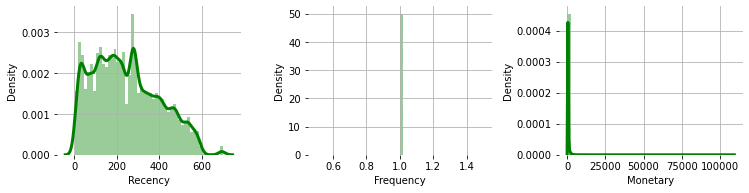

In [64]:
plt.figure(figsize=(14, 5))
for i in range(len(rfm_num)):
    plt.subplot(2,4,i+1)
    sns.distplot(rfm_cluster_interpretation[rfm_num[i]],color='g')
    plt.grid()
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tight_layout()    

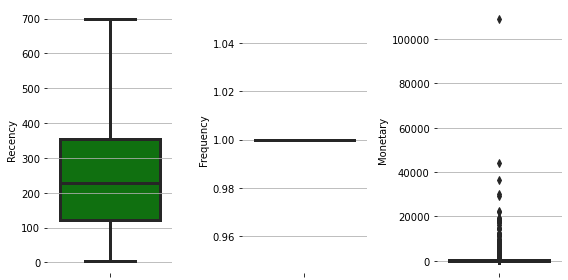

In [65]:
for i in range(len(rfm_num)):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=rfm_cluster_interpretation[rfm_num[i]],color='g',orient='v')
    plt.grid(axis='y')
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.tight_layout()

In [66]:
#HANDLING OUTLIER
#Monetary
Q1_monetary = rfm_cluster_interpretation['Monetary'].quantile(0.25)
Q3_monetary = rfm_cluster_interpretation['Monetary'].quantile(0.75)
IQR = Q3_monetary - Q1_monetary
bottom_treshold_monetary = Q1_monetary - (1.5*IQR)
upper_treshold_monetary = Q3_monetary + (1.5*IQR)

rfm_cluster_interpretation = rfm_cluster_interpretation[((rfm_df['Monetary'] > bottom_treshold_monetary) & 
                                                         (rfm_df['Monetary'] < upper_treshold_monetary))]

In [67]:
rfm_cluster_interpretation

,Recency,Frequency,Monetary
0,474,1,114.74
1,298,1,67.41
2,298,1,195.42
3,483,1,179.35
4,211,1,107.01
...,...,...,...
94466,327,1,91.91
94467,279,1,81.36
94468,358,1,63.13
94469,355,1,214.13


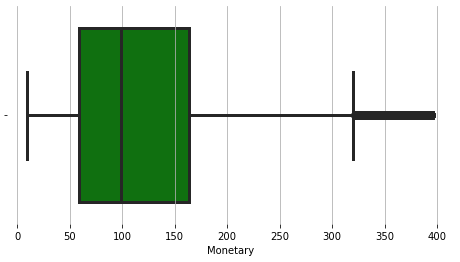

In [68]:
#AFTER HANDLING OUTLIER
sns.boxplot(x=rfm_cluster_interpretation['Monetary'],color='g')
plt.grid(axis='x')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

I think its acceptable eventhough from looking at monetary boxplot there are still many outlier there. It means that there are still many data outside of IQR treshold that have been set. So it confirm that monetary distribution is skewed.

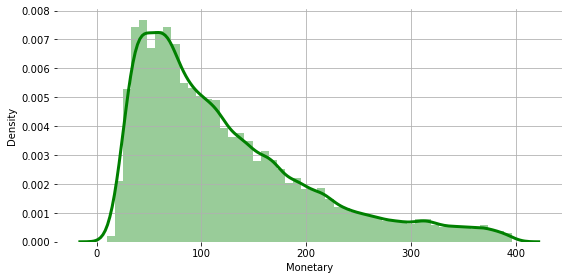

In [69]:
#Distribution after removing Outlier
sns.distplot(rfm_cluster_interpretation['Monetary'],color='g')
plt.grid()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()

In [70]:
print('-'*5,'Evaluation After Handling Outlier','-'*5)
print(f'Recency = Multimodal Distribution')
print(f'Frequency = Normal Distribution')
print(f'Monetary = Right Skewness Distribution')

----- Evaluation After Handling Outlier -----
Recency = Multimodal Distribution
Frequency = Normal Distribution
Monetary = Right Skewness Distribution


In [71]:
#Do Log Transformation for Recency & Monetary
rfm_df_log = rfm_cluster_interpretation.copy()
rfm_df_log['Recency'] = np.log10(rfm_df_log['Recency'])
rfm_df_log['Monetary'] = np.log10(rfm_df_log['Monetary'])

In [72]:
#Standardization for all features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
rfm_df_cluster = sc.fit_transform(rfm_df_log)

# CLUSTERING:

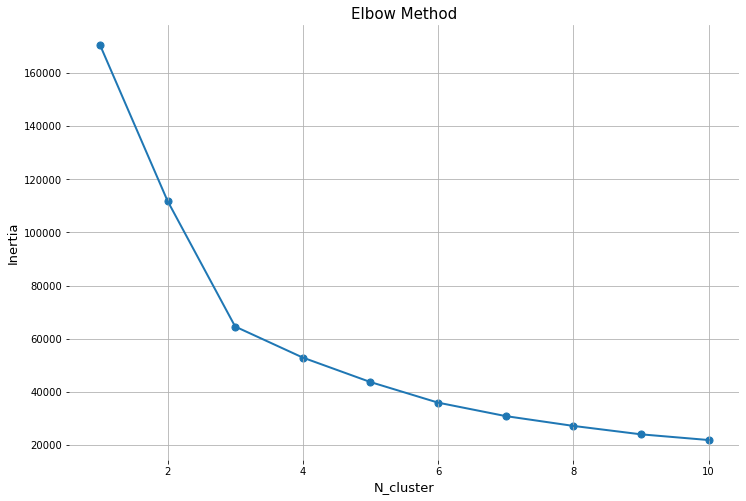

In [73]:
#Evaluation using Elbow Method
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(rfm_df_cluster)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.scatter(range(1,11),inertia,s=50)
ax = plt.gca()
plt.plot(range(1,11),inertia,linewidth=2)
plt.title('Elbow Method',fontsize=15)
plt.grid()
ax.spines[:].set_visible(False)
plt.ylabel('Inertia',fontsize=13)
plt.xlabel('N_cluster',fontsize=13)
plt.show()

In [74]:
inertia_table = pd.DataFrame((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100, columns=['Inertia Reduction (%)'])
inertia_table

,Inertia Reduction (%)
0,34.429914
1,42.257134
2,18.070285
3,17.389344
4,17.719580
5,14.062065
6,11.935644
7,11.637772
8,8.916645
9,NaN


From the elbow method graph and inertia table shows that when change from 2 clusters into 3 clusters will have the biggest inertia reduction, and from 3 clusters into 4 clusters the inertia reduction decrease significantly. **So, from elbow method result the optimal number of cluster is k=3**.

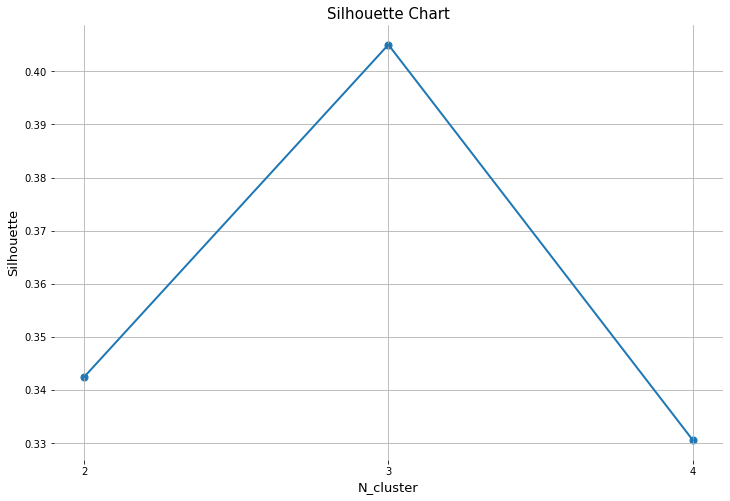

In [75]:
from sklearn.metrics import silhouette_score
silhouette = []
for i in range(2,5):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(rfm_df_cluster)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(rfm_df_cluster,labels=labels))
plt.figure(figsize=(12,8))
plt.scatter(range(2,5),silhouette,s=50)
plt.plot(range(2,5),silhouette,linewidth=2)
plt.grid()
ax = plt.gca()
plt.title('Silhouette Chart',fontsize=15)
plt.ylabel('Silhouette',fontsize=13)
plt.xlabel('N_cluster',fontsize=13)
ticks = [2,3,4]
plt.xticks(range(2,5),labels=ticks)
ax.spines[:].set_visible(False)
plt.show()

From the Silhouette Chart it also show that with k=3 it will give bigger silhouette score. **So for the next analysis k = 3 will be used**

In [76]:
kmeans = KMeans(n_clusters=3,random_state=42).fit(rfm_df_cluster)
kmeans.fit(rfm_df_cluster)

KMeans(n_clusters=3, random_state=42)

In [77]:
rfm_df_cluster = pd.DataFrame(rfm_df_cluster)
rfm_df_cluster['Cluster'] = kmeans.labels_
rfm_df_cluster.columns = ['Recency','Frequency','Monetary','Cluster']
rfm_df_cluster.head()

,Recency,Frequency,Monetary,Cluster
0,1.070537,0.0,0.240454,0
1,0.538985,0.0,-0.538159,1
2,0.538985,0.0,1.019956,0
3,1.092080,0.0,0.894335,0
4,0.143585,0.0,0.138352,0


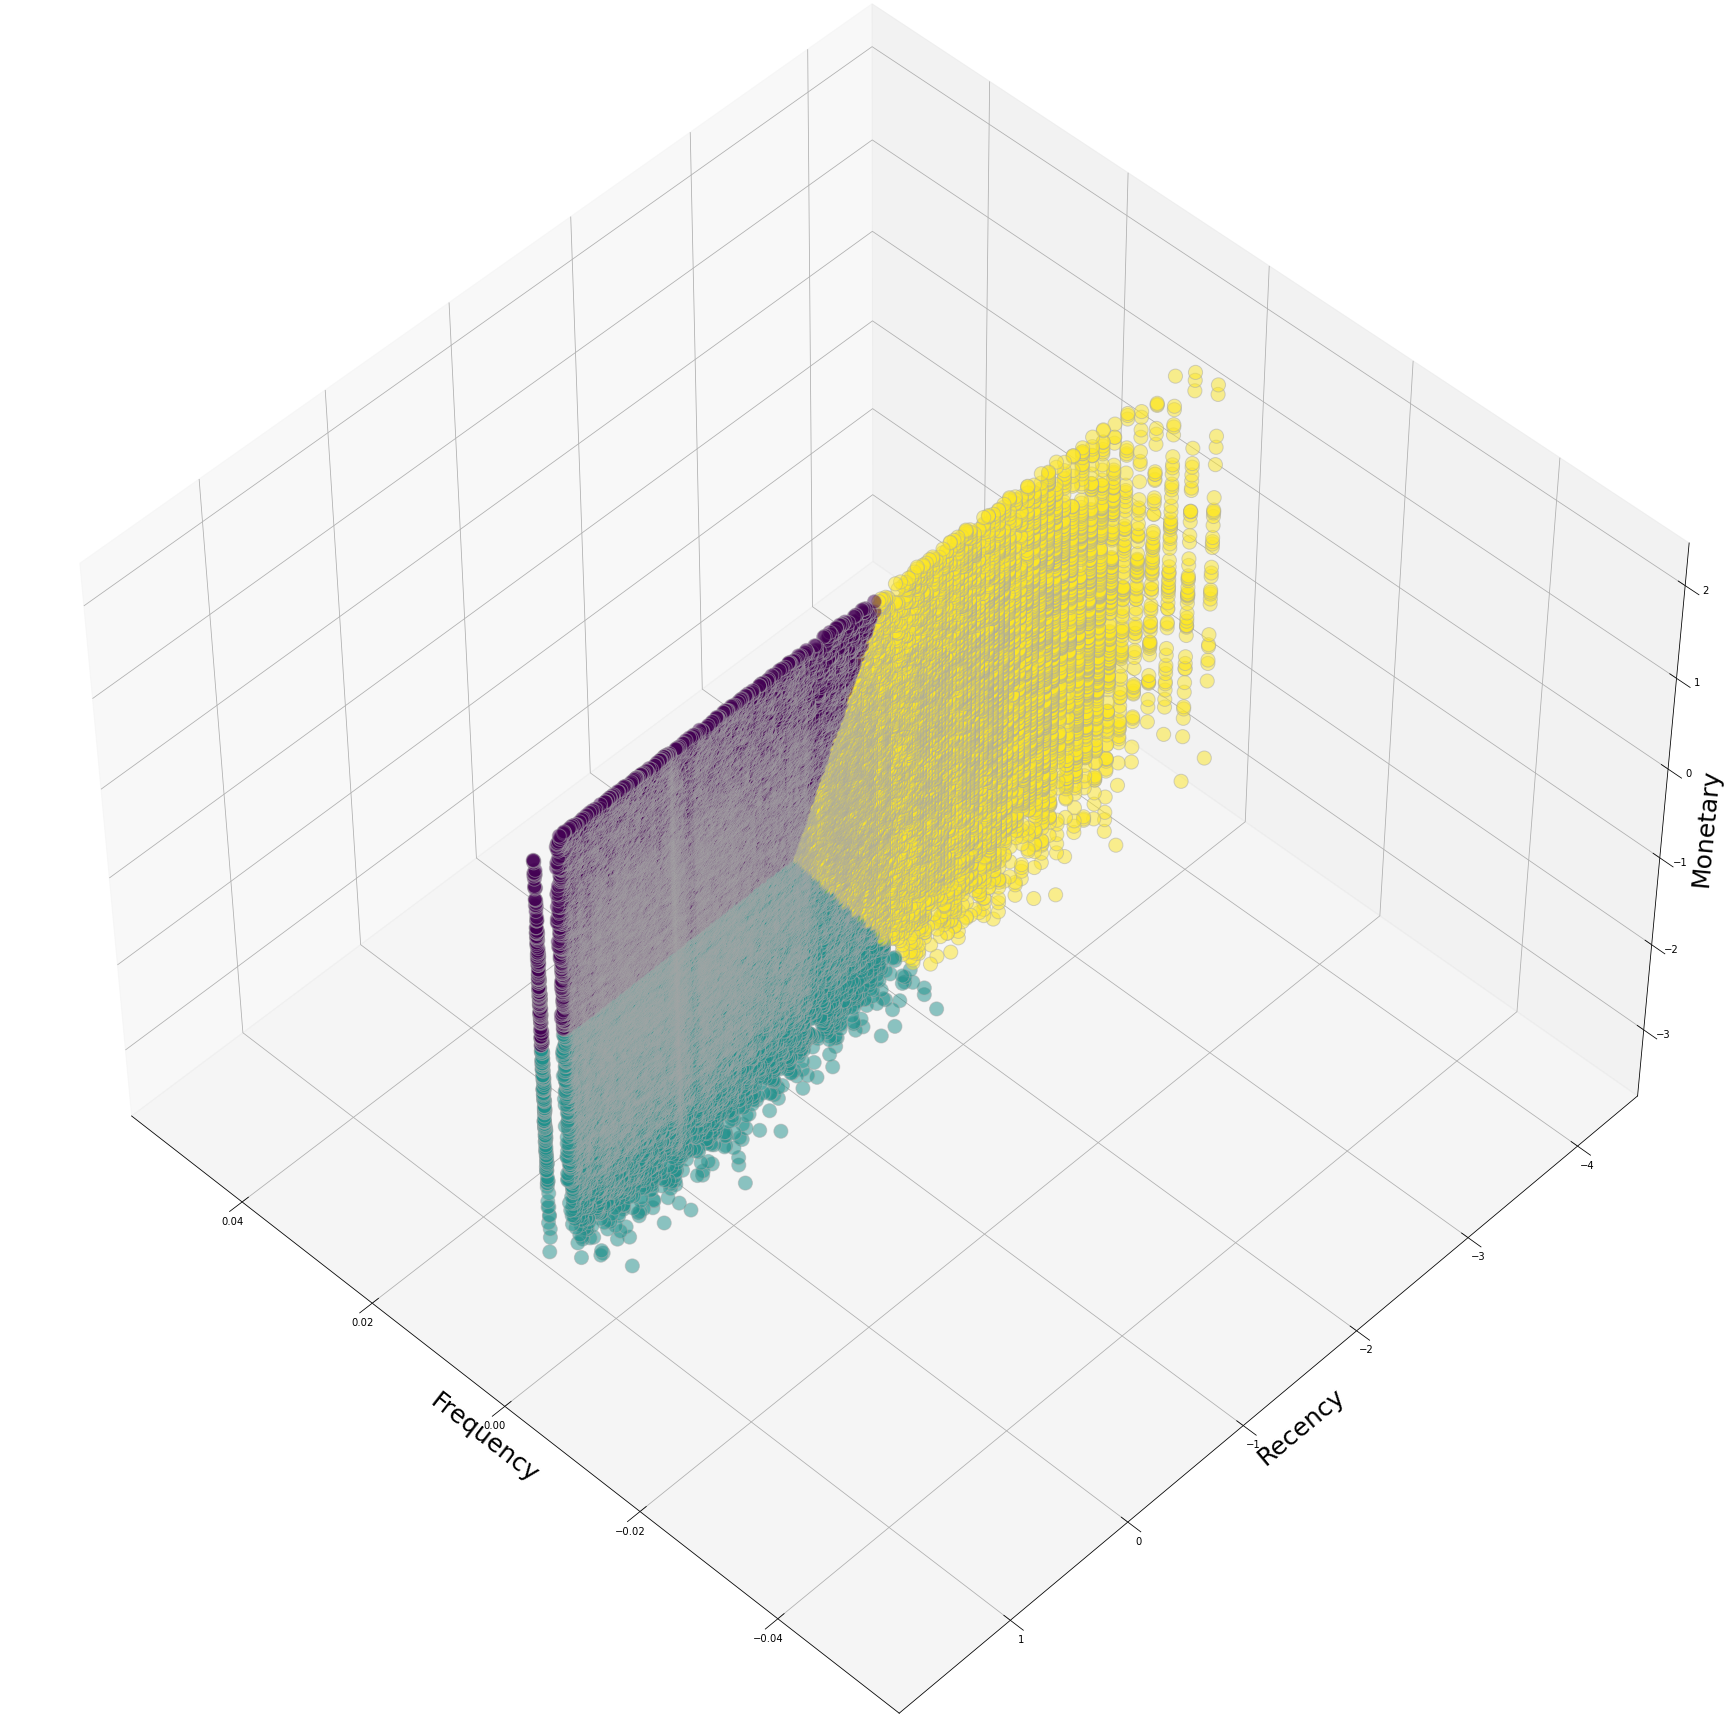

In [78]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(25,25))
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig,
            rect = [0, 0, 0.95, 1],
            elev = 48,
            azim = 134)
plt.cla()
ax.scatter(rfm_df_cluster['Frequency'], rfm_df_cluster['Recency'], rfm_df_cluster['Monetary'],
           c=rfm_df_cluster['Cluster'], s=200, alpha=0.5, edgecolor='darkgrey')
ax.set_xlabel('Frequency', fontsize=25)
ax.set_ylabel('Recency', fontsize=25)
ax.set_zlabel('Monetary', fontsize=25)
plt.show()

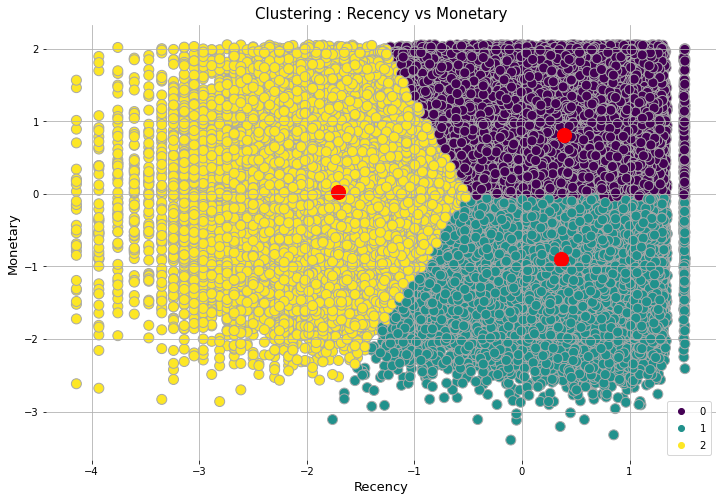

In [79]:
#Because the frequency is always the same, it can be easily interpreted in 2D view

plt.figure(figsize=(12,8))
scatter_graph = plt.scatter(x = rfm_df_cluster['Recency'], y = rfm_df_cluster['Monetary'],s=100,
                            c=rfm_df_cluster['Cluster'], edgecolor='darkgrey')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,2],c='red',s=200)
plt.title('Clustering : Recency vs Monetary', fontsize=15)
plt.xlabel('Recency',fontsize=13)
plt.ylabel('Monetary',fontsize=13)
plt.grid()
ax = plt.gca()
ax.spines[:].set_visible(False)
plt.legend(*scatter_graph.legend_elements() ,loc=4)
plt.show()

In [80]:
rfm_cluster_interpretation['klabel'] = kmeans.labels_
rfm_cluster_interpretation

,Recency,Frequency,Monetary,klabel
0,474,1,114.74,0
1,298,1,67.41,1
2,298,1,195.42,0
3,483,1,179.35,0
4,211,1,107.01,0
...,...,...,...,...
94466,327,1,91.91,1
94467,279,1,81.36,1
94468,358,1,63.13,1
94469,355,1,214.13,0


In [81]:
rfm_cluster_interpretation = rfm_cluster_interpretation.groupby('klabel').agg({'Recency':'mean',
                                                                               'Frequency':'mean',
                                                                               'Monetary':['mean','count']})

In [82]:
rfm_cluster_interpretation

Recency Frequency    Monetary       
              mean      mean        mean  count
klabel                                         
0       291.671621       1.0  183.363450  36266
1       287.653323       1.0   56.773529  33700
2        49.615370       1.0  118.620067  15355

It's kinda hard to interpreted RFM from the table above, because the Frequency of each customer is 1. But assuming all of clusters frequency categorized as `LOW` it can make table interpreted easier. 


What does each cluster represent :

* Cluster 0 = (High Recency / Low Frequency / High Monetary) <br>
Can be considered as at risk of churn customers. This type of customers is a great past customers who haven't bought in awhile. There are many reason for this to be happened. The best way is to find the reason of why this type of customers decided to churn and customized marketing strategy to encourage this type of customers come back spending here. <br>
e.g. : give free delivery voucher with no minimum payment, give a huge discount or make bundling promo on products that this customers tend to buy in the old days.


* Cluster 1 = (High Recency / Low Frequency / Low Monetary) <br>
Can be considered as 'Free Trial' user. This type of customer at first is just experimenting to buy products from this e-commerce. Maybe this type of customers just want to exploit the privilege promotion for new users. But unfortunetly this type of customers dont have a reason to be a loyal customers because of certain factors. Marketing team should make new strategy to make this 'Free trial' customers evolve into loyal customers. <br>
e.g. : Increase advertising about this e-commerce so this type of customers will always remember of this e-commerce brand and will indirectly choose to buy the products here, create a loyalty point system where these points can be exchanged into several choices of products when they reach a certain number, give cashback voucher & free delivery voucher with minimum payment but not as much as to new promising customers are given.


* Cluster 2 = (Low Recency / Low Frequency / Medium Monetary) <br>
Can be considered as New Promising Customer, eventough have low frequency, this type of customers monetary is on the medium level category and just recent buy some products at the e-commerce. So some marketing effort could be advisable towards it in order to increase its monetary value. <br> e.g. : give cashback voucher or free delivery voucher special for this type of customers.
